In [2]:
import tensorflow as tf

In [1]:
import pandas as pd

In [3]:
import mysql.connector

# Connect to MySQL database (replace with your database connection details)
conn =  mysql.connector.connect(host="127.0.0.1",user="root",password="Saivai_22",database="gravity_book")


# Create a cursor object
cursor = conn.cursor()

In [4]:
cursor.execute("use gravity_book;")
conn.commit()

In [5]:
cursor.execute("show tables;")
for a in cursor:
    print(a)

('address',)
('address_status',)
('author',)
('book',)
('book_author',)
('book_language',)
('country',)
('cust_order',)
('customer',)
('customer_address',)
('order_history',)
('order_line',)
('order_status',)
('publisher',)
('shipping_method',)


In [6]:
#Extracting data from database to dataframe
query = """select * from book b 
inner join publisher p on b.publisher_id=p.publisher_id
inner join book_author ba on b.book_id=ba.book_id
inner join author a on a.author_id=ba.author_id
inner join book_language bl on b.language_id=bl.language_id;"""

In [7]:
bookdf=pd.read_sql(query,conn)
bookdf

C:\Users\admin\AppData\Local\Temp\ipykernel_2836\139836424.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  bookdf=pd.read_sql(query,conn)


,book_id,title,isbn13,language_id,num_pages,publication_date,publisher_id,publisher_id,publisher_name,book_id,author_id,author_id,author_name,language_id,language_code,language_name
0,2,The Illuminati,20049130001,1,352,2004-10-04,1967,1967,Thomas Nelson,2,5049,5049,Larry Burkett,1,eng,English
1,3,The Servant Leader,23755004321,1,128,2003-03-11,1967,1967,Thomas Nelson,3,4902,4902,Kenneth H. Blanchard,1,eng,English
2,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,1978,Time Life Medical,4,8651,8651,Time-Life Books,1,eng,English
3,5,Cliffs Notes on Aristophanes' Lysistrata The ...,49086007763,1,80,1983-12-29,416,416,Cliffs Notes,5,8904,8904,W. John Campbell,1,eng,English
4,6,Life Is a Dream and Other Spanish Classics (Er...,73999140774,1,298,2000-04-01,96,96,Applause Theatre & Cinema Book Publishers,6,2497,2497,Eric Bentley,1,eng,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17637,8624,In Wonderland,9780970312556,24,185,2003-09-01,1009,1009,Ig Publishing,8624,8430,8430,Sverre Lyngstad,24,nor,Norwegian
17638,10854,Harry Potter ve Sırlar Odası (Harry Potter #2),9783570211021,25,403,2001-10-01,2234,2234,Yapı Kredi Yayınları,10854,3570,3570,J.K. Rowling,25,tur,Turkish
17639,10854,Harry Potter ve Sırlar Odası (Harry Potter #2),9783570211021,25,403,2001-10-01,2234,2234,Yapı Kredi Yayınları,10854,7996,7996,Sevin Okyay,25,tur,Turkish
17640,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,294,Bloomsbury USA Childrens,9702,3570,3570,J.K. Rowling,26,gla,Gaelic


In [8]:
bookdf.columns.duplicated()

array([False, False, False, False, False, False, False,  True, False,
        True, False,  True, False,  True, False, False])

In [9]:
bookdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17642 entries, 0 to 17641
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           17642 non-null  int64 
 1   title             17642 non-null  object
 2   isbn13            17642 non-null  object
 3   language_id       17642 non-null  int64 
 4   num_pages         17642 non-null  int64 
 5   publication_date  17642 non-null  object
 6   publisher_id      17642 non-null  int64 
 7   publisher_id      17642 non-null  int64 
 8   publisher_name    17642 non-null  object
 9   book_id           17642 non-null  int64 
 10  author_id         17642 non-null  int64 
 11  author_id         17642 non-null  int64 
 12  author_name       17642 non-null  object
 13  language_id       17642 non-null  int64 
 14  language_code     17642 non-null  object
 15  language_name     17642 non-null  object
dtypes: int64(9), object(7)
memory usage: 2.2+ MB


In [10]:
bookdf=bookdf.T.drop_duplicates().T

In [11]:
bookdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17642 entries, 0 to 17641
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           17642 non-null  object
 1   title             17642 non-null  object
 2   isbn13            17642 non-null  object
 3   language_id       17642 non-null  object
 4   num_pages         17642 non-null  object
 5   publication_date  17642 non-null  object
 6   publisher_id      17642 non-null  object
 7   publisher_name    17642 non-null  object
 8   author_id         17642 non-null  object
 9   author_name       17642 non-null  object
 10  language_code     17642 non-null  object
 11  language_name     17642 non-null  object
dtypes: object(12)
memory usage: 1.6+ MB


In [12]:
query2="""select * from customer c 
inner join customer_address ca on c.customer_id=ca.customer_id
inner join address_status ads on ca.status_id=ads.status_id
inner join address ad on ad.address_id=ca.address_id
inner join country ct on ct.country_id=ad.country_id;"""

In [13]:
clientdf=pd.read_sql(query2,conn)
clientdf

C:\Users\admin\AppData\Local\Temp\ipykernel_2836\1636189976.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  clientdf=pd.read_sql(query2,conn)


,customer_id,first_name,last_name,email,customer_id,address_id,status_id,status_id,address_status,address_id,street_number,street_name,city,country_id,country_id,country_name
0,1,Ursola,Purdy,upurdy0@cdbaby.com,1,165,1,1,Active,165,82115,Holy Cross Trail,Fatumuti,92,92,Indonesia
1,1,Ursola,Purdy,upurdy0@cdbaby.com,1,444,1,1,Active,444,2,Dayton Terrace,Majingklak,92,92,Indonesia
2,1,Ursola,Purdy,upurdy0@cdbaby.com,1,741,2,2,Inactive,741,53436,Warbler Drive,Yanglin,42,42,China
3,2,Ruthanne,Vatini,rvatini1@fema.gov,2,78,1,1,Active,78,1,Harper Parkway,Murree,155,155,Pakistan
4,3,Reidar,Turbitt,rturbitt2@geocities.jp,3,17,2,2,Inactive,17,252,Main Plaza,Moshenskoye,172,172,Russia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3345,1997,Janean,Coatsworth,jcoatsworthro@purevolume.com,1997,168,1,1,Active,168,76,Montana Hill,Międzyrzecz,163,163,Poland
3346,1997,Janean,Coatsworth,jcoatsworthro@purevolume.com,1997,533,1,1,Active,533,14712,Grover Avenue,Casal Galego,164,164,Portugal
3347,1998,Georgeanna,Garman,ggarmanrp@surveymonkey.com,1998,256,1,1,Active,256,16,Doe Crossing Point,Thị Trấn Phù Yên,221,221,Vietnam
3348,1999,Ardeen,Caret,acaretrq@wsj.com,1999,246,1,1,Active,246,1,Oxford Way,Sobienie Jeziory,163,163,Poland


In [14]:
clientdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3350 entries, 0 to 3349
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     3350 non-null   int64 
 1   first_name      3350 non-null   object
 2   last_name       3350 non-null   object
 3   email           3350 non-null   object
 4   customer_id     3350 non-null   int64 
 5   address_id      3350 non-null   int64 
 6   status_id       3350 non-null   int64 
 7   status_id       3350 non-null   int64 
 8   address_status  3350 non-null   object
 9   address_id      3350 non-null   int64 
 10  street_number   3350 non-null   object
 11  street_name     3350 non-null   object
 12  city            3350 non-null   object
 13  country_id      3350 non-null   int64 
 14  country_id      3350 non-null   int64 
 15  country_name    3350 non-null   object
dtypes: int64(8), object(8)
memory usage: 418.9+ KB


In [15]:
clientdf=clientdf.T.drop_duplicates().T
clientdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3350 entries, 0 to 3349
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     3350 non-null   object
 1   first_name      3350 non-null   object
 2   last_name       3350 non-null   object
 3   email           3350 non-null   object
 4   address_id      3350 non-null   object
 5   status_id       3350 non-null   object
 6   address_status  3350 non-null   object
 7   street_number   3350 non-null   object
 8   street_name     3350 non-null   object
 9   city            3350 non-null   object
 10  country_id      3350 non-null   object
 11  country_name    3350 non-null   object
dtypes: object(12)
memory usage: 314.2+ KB


In [16]:
query3="""select * from order_line ol 
inner join cust_order co on ol.order_id=co.order_id
inner join shipping_method sm on sm.method_id=co.shipping_method_id
inner join order_history oh on oh.order_id=ol.order_id
inner join order_status os on os.status_id=oh.status_id;"""

In [17]:
orderdf=pd.read_sql(query3,conn)
orderdf

C:\Users\admin\AppData\Local\Temp\ipykernel_2836\132279916.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  orderdf=pd.read_sql(query3,conn)


,line_id,order_id,book_id,price,order_id,order_date,customer_id,shipping_method_id,dest_address_id,method_id,method_name,cost,history_id,order_id,status_id,status_date,status_id,status_value
0,1296,1,3263,15.22,1,2022-08-28 00:10:49,352,1,1,1,Standard,5.9,1,1,1,2022-08-28 11:49:48,1,Order Received
1,1296,1,3263,15.22,1,2022-08-28 00:10:49,352,1,1,1,Standard,5.9,24850,1,5,2022-08-29 07:56:28,5,Cancelled
2,8338,1,3862,13.43,1,2022-08-28 00:10:49,352,1,1,1,Standard,5.9,1,1,1,2022-08-28 11:49:48,1,Order Received
3,8338,1,3862,13.43,1,2022-08-28 00:10:49,352,1,1,1,Standard,5.9,24850,1,5,2022-08-29 07:56:28,5,Cancelled
4,2382,7,420,9.21,7,2025-01-01 14:16:54,627,1,3,1,Standard,5.9,7,7,1,2025-01-01 17:20:19,1,Order Received
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45516,8651,11429,10391,9.69,11429,2023-05-16 02:39:55,168,4,14,4,International,24.5,22280,11429,4,2023-05-20 13:51:16,4,Delivered
45517,13990,11429,683,12.60,11429,2023-05-16 02:39:55,168,4,14,4,International,24.5,7542,11429,1,2023-05-16 10:37:03,1,Order Received
45518,13990,11429,683,12.60,11429,2023-05-16 02:39:55,168,4,14,4,International,24.5,13027,11429,2,2023-05-18 00:07:56,2,Pending Delivery
45519,13990,11429,683,12.60,11429,2023-05-16 02:39:55,168,4,14,4,International,24.5,16512,11429,3,2023-05-18 02:24:28,3,Delivery In Progress


In [18]:
orderdf=orderdf.T.drop_duplicates().T
orderdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45521 entries, 0 to 45520
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   line_id             45521 non-null  object
 1   order_id            45521 non-null  object
 2   book_id             45521 non-null  object
 3   price               45521 non-null  object
 4   order_date          45521 non-null  object
 5   customer_id         45521 non-null  object
 6   shipping_method_id  45521 non-null  object
 7   dest_address_id     45521 non-null  object
 8   method_name         45521 non-null  object
 9   cost                45521 non-null  object
 10  history_id          45521 non-null  object
 11  status_id           45521 non-null  object
 12  status_date         45521 non-null  object
 13  status_value        45521 non-null  object
dtypes: object(14)
memory usage: 4.9+ MB


In [19]:
df1=pd.merge(bookdf,orderdf,on='book_id',how='inner')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74291 entries, 0 to 74290
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   book_id             74291 non-null  object
 1   title               74291 non-null  object
 2   isbn13              74291 non-null  object
 3   language_id         74291 non-null  object
 4   num_pages           74291 non-null  object
 5   publication_date    74291 non-null  object
 6   publisher_id        74291 non-null  object
 7   publisher_name      74291 non-null  object
 8   author_id           74291 non-null  object
 9   author_name         74291 non-null  object
 10  language_code       74291 non-null  object
 11  language_name       74291 non-null  object
 12  line_id             74291 non-null  object
 13  order_id            74291 non-null  object
 14  price               74291 non-null  object
 15  order_date          74291 non-null  object
 16  customer_id         74

In [20]:
#merging dataframes to one final dataframe
finaldf=pd.merge(df1,clientdf,on='customer_id',how='inner')
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151644 entries, 0 to 151643
Data columns (total 36 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   book_id             151644 non-null  object
 1   title               151644 non-null  object
 2   isbn13              151644 non-null  object
 3   language_id         151644 non-null  object
 4   num_pages           151644 non-null  object
 5   publication_date    151644 non-null  object
 6   publisher_id        151644 non-null  object
 7   publisher_name      151644 non-null  object
 8   author_id           151644 non-null  object
 9   author_name         151644 non-null  object
 10  language_code       151644 non-null  object
 11  language_name       151644 non-null  object
 12  line_id             151644 non-null  object
 13  order_id            151644 non-null  object
 14  price               151644 non-null  object
 15  order_date          151644 non-null  object
 16  cu

In [21]:
#Checking if there are any duplicate columns
finaldf.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [22]:
finaldf

,book_id,title,isbn13,language_id,num_pages,publication_date,publisher_id,publisher_name,author_id,author_name,...,last_name,email,address_id,status_id_y,address_status,street_number,street_name,city,country_id,country_name
0,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,...,Kops,dkops7e@toplist.cz,139,1,Active,9939,Judy Avenue,Novo,164,Portugal
1,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,...,Kops,dkops7e@toplist.cz,139,1,Active,9939,Judy Avenue,Novo,164,Portugal
2,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,...,Nation,wnationmv@google.co.jp,122,1,Active,5826,Hallows Crossing,Donskoye,172,Russia
3,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,...,Nation,wnationmv@google.co.jp,257,1,Active,3,Bayside Pass,Jieshou,42,China
4,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,...,Nation,wnationmv@google.co.jp,570,1,Active,1,Mariners Cove Trail,Jaunpils,115,Latvia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151639,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,...,Coatsworth,jcoatsworthro@purevolume.com,533,1,Active,14712,Grover Avenue,Casal Galego,164,Portugal
151640,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,...,Percifull,apercifullnf@archive.org,214,1,Active,29493,Hoard Street,Mabayo,159,Philippines
151641,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,...,Percifull,apercifullnf@archive.org,214,1,Active,29493,Hoard Street,Mabayo,159,Philippines
151642,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,...,Percifull,apercifullnf@archive.org,214,1,Active,29493,Hoard Street,Mabayo,159,Philippines


In [23]:
pd.set_option('display.max_columns',None)

In [24]:
finaldf

,book_id,title,isbn13,language_id,num_pages,publication_date,publisher_id,publisher_name,author_id,author_name,language_code,language_name,line_id,order_id,price,order_date,customer_id,shipping_method_id,dest_address_id,method_name,cost,history_id,status_id_x,status_date,status_value,first_name,last_name,email,address_id,status_id_y,address_status,street_number,street_name,city,country_id,country_name
0,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,8439,4537,18.07,2023-06-01 05:18:18,267,2,139,Priority,8.9,2941,1,2023-06-01 15:39:42,Order Received,Derrek,Kops,dkops7e@toplist.cz,139,1,Active,9939,Judy Avenue,Novo,164,Portugal
1,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,8439,4537,18.07,2023-06-01 05:18:18,267,2,139,Priority,8.9,8733,2,2023-06-03 00:21:55,Pending Delivery,Derrek,Kops,dkops7e@toplist.cz,139,1,Active,9939,Judy Avenue,Novo,164,Portugal
2,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,14549,9018,18.55,2024-01-17 19:58:54,1824,3,257,Express,11.9,6027,1,2024-01-17 23:21:11,Order Received,Whitney,Nation,wnationmv@google.co.jp,122,1,Active,5826,Hallows Crossing,Donskoye,172,Russia
3,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,14549,9018,18.55,2024-01-17 19:58:54,1824,3,257,Express,11.9,6027,1,2024-01-17 23:21:11,Order Received,Whitney,Nation,wnationmv@google.co.jp,257,1,Active,3,Bayside Pass,Jieshou,42,China
4,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,14549,9018,18.55,2024-01-17 19:58:54,1824,3,257,Express,11.9,6027,1,2024-01-17 23:21:11,Order Received,Whitney,Nation,wnationmv@google.co.jp,570,1,Active,1,Mariners Cove Trail,Jaunpils,115,Latvia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151639,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,gla,Gaelic,10133,1774,11.38,2023-10-08 12:19:23,1997,2,533,Priority,8.9,1773,1,2023-10-08 12:49:58,Order Received,Janean,Coatsworth,jcoatsworthro@purevolume.com,533,1,Active,14712,Grover Avenue,Casal Galego,164,Portugal
151640,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,gla,Gaelic,11930,6835,16.95,2024-02-23 11:14:28,844,2,214,Priority,8.9,4692,1,2024-02-23 18:57:53,Order Received,Ardeen,Percifull,apercifullnf@archive.org,214,1,Active,29493,Hoard Street,Mabayo,159,Philippines
151641,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,gla,Gaelic,11930,6835,16.95,2024-02-23 11:14:28,844,2,214,Priority,8.9,10588,2,2024-02-23 23:27:07,Pending Delivery,Ardeen,Percifull,apercifullnf@archive.org,214,1,Active,29493,Hoard Street,Mabayo,159,Philippines
151642,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,gla,Gaelic,11930,6835,16.95,2024-02-23 11:14:28,844,2,214,Priority,8.9,18756,3,2024-02-25 06:16:58,Delivery In Progress,Ardeen,Percifull,apercifullnf@archive.org,214,1,Active,29493,Hoard Street,Mabayo,159,Philippines


In [25]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151644 entries, 0 to 151643
Data columns (total 36 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   book_id             151644 non-null  object
 1   title               151644 non-null  object
 2   isbn13              151644 non-null  object
 3   language_id         151644 non-null  object
 4   num_pages           151644 non-null  object
 5   publication_date    151644 non-null  object
 6   publisher_id        151644 non-null  object
 7   publisher_name      151644 non-null  object
 8   author_id           151644 non-null  object
 9   author_name         151644 non-null  object
 10  language_code       151644 non-null  object
 11  language_name       151644 non-null  object
 12  line_id             151644 non-null  object
 13  order_id            151644 non-null  object
 14  price               151644 non-null  object
 15  order_date          151644 non-null  object
 16  cu

In [26]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [27]:
backupdf=finaldf.copy()

In [28]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151644 entries, 0 to 151643
Data columns (total 36 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   book_id             151644 non-null  object
 1   title               151644 non-null  object
 2   isbn13              151644 non-null  object
 3   language_id         151644 non-null  object
 4   num_pages           151644 non-null  object
 5   publication_date    151644 non-null  object
 6   publisher_id        151644 non-null  object
 7   publisher_name      151644 non-null  object
 8   author_id           151644 non-null  object
 9   author_name         151644 non-null  object
 10  language_code       151644 non-null  object
 11  language_name       151644 non-null  object
 12  line_id             151644 non-null  object
 13  order_id            151644 non-null  object
 14  price               151644 non-null  object
 15  order_date          151644 non-null  object
 16  cu

In [29]:
finaldf.method_name.value_counts()

method_name
Standard         38341
International    38087
Express          37959
Priority         37257
Name: count, dtype: int64

In [30]:
min_dates=finaldf.groupby(["customer_id"])["order_date"].min() #getting the min date of order dates for each customer

In [31]:
finaldf["firstpurchasedate"]=finaldf.apply(lambda row:min_dates.loc[row["customer_id"]],axis=1) #calculating the first purchase date of each customer

In [32]:
max_dates=finaldf.groupby(["customer_id"])["order_date"].max()
finaldf["lastpurchasedate"]=finaldf.apply(lambda row:max_dates.loc[row["customer_id"]],axis=1) #calculating the last purchase date of each customer

In [33]:
finaldf

,book_id,title,isbn13,language_id,num_pages,publication_date,publisher_id,publisher_name,author_id,author_name,language_code,language_name,line_id,order_id,price,order_date,customer_id,shipping_method_id,dest_address_id,method_name,cost,history_id,status_id_x,status_date,status_value,first_name,last_name,email,address_id,status_id_y,address_status,street_number,street_name,city,country_id,country_name,firstpurchasedate,lastpurchasedate
0,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,8439,4537,18.07,2023-06-01 05:18:18,267,2,139,Priority,8.9,2941,1,2023-06-01 15:39:42,Order Received,Derrek,Kops,dkops7e@toplist.cz,139,1,Active,9939,Judy Avenue,Novo,164,Portugal,2023-05-25 06:18:07,2025-01-28 04:30:03
1,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,8439,4537,18.07,2023-06-01 05:18:18,267,2,139,Priority,8.9,8733,2,2023-06-03 00:21:55,Pending Delivery,Derrek,Kops,dkops7e@toplist.cz,139,1,Active,9939,Judy Avenue,Novo,164,Portugal,2023-05-25 06:18:07,2025-01-28 04:30:03
2,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,14549,9018,18.55,2024-01-17 19:58:54,1824,3,257,Express,11.9,6027,1,2024-01-17 23:21:11,Order Received,Whitney,Nation,wnationmv@google.co.jp,122,1,Active,5826,Hallows Crossing,Donskoye,172,Russia,2022-06-10 09:25:43,2025-01-25 12:05:29
3,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,14549,9018,18.55,2024-01-17 19:58:54,1824,3,257,Express,11.9,6027,1,2024-01-17 23:21:11,Order Received,Whitney,Nation,wnationmv@google.co.jp,257,1,Active,3,Bayside Pass,Jieshou,42,China,2022-06-10 09:25:43,2025-01-25 12:05:29
4,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,14549,9018,18.55,2024-01-17 19:58:54,1824,3,257,Express,11.9,6027,1,2024-01-17 23:21:11,Order Received,Whitney,Nation,wnationmv@google.co.jp,570,1,Active,1,Mariners Cove Trail,Jaunpils,115,Latvia,2022-06-10 09:25:43,2025-01-25 12:05:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151639,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,gla,Gaelic,10133,1774,11.38,2023-10-08 12:19:23,1997,2,533,Priority,8.9,1773,1,2023-10-08 12:49:58,Order Received,Janean,Coatsworth,jcoatsworthro@purevolume.com,533,1,Active,14712,Grover Avenue,Casal Galego,164,Portugal,2022-03-10 08:11:29,2023-10-08 12:19:23
151640,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,gla,Gaelic,11930,6835,16.95,2024-02-23 11:14:28,844,2,214,Priority,8.9,4692,1,2024-02-23 18:57:53,Order Received,Ardeen,Percifull,apercifullnf@archive.org,214,1,Active,29493,Hoard Street,Mabayo,159,Philippines,2022-09-04 15:33:05,2024-02-23 11:14:28
151641,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,gla,Gaelic,11930,6835,16.95,2024-02-23 11:14:28,844,2,214,Priority,8.9,10588,2,2024-02-23 23:27:07,Pending Delivery,Ardeen,Percifull,apercifullnf@archive.org,214,1,Active,29493,Hoard Street,Mabayo,159,Philippines,2022-09-04 15:33:05,2024-02-23 11:14:28
151642,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,gla,Gaelic,11930,6835,16.95,2024-02-23 11:14:28,844,2,214,Priority,8.9,18756,3,2024-02-25 06:16:58,Delivery In Progress,Ardeen,Percifull,apercifullnf@archive.org,214,1,Active,29493,Hoard Street,Mabayo,159,Philippines,2022-09-04 15:33:05,2024-

In [34]:
import datetime as dt

In [35]:
finaldf["firstpurchasedate"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 151644 entries, 0 to 151643
Series name: firstpurchasedate
Non-Null Count   Dtype         
--------------   -----         
151644 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.2 MB


In [36]:
finaldf

,book_id,title,isbn13,language_id,num_pages,publication_date,publisher_id,publisher_name,author_id,author_name,language_code,language_name,line_id,order_id,price,order_date,customer_id,shipping_method_id,dest_address_id,method_name,cost,history_id,status_id_x,status_date,status_value,first_name,last_name,email,address_id,status_id_y,address_status,street_number,street_name,city,country_id,country_name,firstpurchasedate,lastpurchasedate
0,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,8439,4537,18.07,2023-06-01 05:18:18,267,2,139,Priority,8.9,2941,1,2023-06-01 15:39:42,Order Received,Derrek,Kops,dkops7e@toplist.cz,139,1,Active,9939,Judy Avenue,Novo,164,Portugal,2023-05-25 06:18:07,2025-01-28 04:30:03
1,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,8439,4537,18.07,2023-06-01 05:18:18,267,2,139,Priority,8.9,8733,2,2023-06-03 00:21:55,Pending Delivery,Derrek,Kops,dkops7e@toplist.cz,139,1,Active,9939,Judy Avenue,Novo,164,Portugal,2023-05-25 06:18:07,2025-01-28 04:30:03
2,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,14549,9018,18.55,2024-01-17 19:58:54,1824,3,257,Express,11.9,6027,1,2024-01-17 23:21:11,Order Received,Whitney,Nation,wnationmv@google.co.jp,122,1,Active,5826,Hallows Crossing,Donskoye,172,Russia,2022-06-10 09:25:43,2025-01-25 12:05:29
3,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,14549,9018,18.55,2024-01-17 19:58:54,1824,3,257,Express,11.9,6027,1,2024-01-17 23:21:11,Order Received,Whitney,Nation,wnationmv@google.co.jp,257,1,Active,3,Bayside Pass,Jieshou,42,China,2022-06-10 09:25:43,2025-01-25 12:05:29
4,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,14549,9018,18.55,2024-01-17 19:58:54,1824,3,257,Express,11.9,6027,1,2024-01-17 23:21:11,Order Received,Whitney,Nation,wnationmv@google.co.jp,570,1,Active,1,Mariners Cove Trail,Jaunpils,115,Latvia,2022-06-10 09:25:43,2025-01-25 12:05:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151639,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,gla,Gaelic,10133,1774,11.38,2023-10-08 12:19:23,1997,2,533,Priority,8.9,1773,1,2023-10-08 12:49:58,Order Received,Janean,Coatsworth,jcoatsworthro@purevolume.com,533,1,Active,14712,Grover Avenue,Casal Galego,164,Portugal,2022-03-10 08:11:29,2023-10-08 12:19:23
151640,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,gla,Gaelic,11930,6835,16.95,2024-02-23 11:14:28,844,2,214,Priority,8.9,4692,1,2024-02-23 18:57:53,Order Received,Ardeen,Percifull,apercifullnf@archive.org,214,1,Active,29493,Hoard Street,Mabayo,159,Philippines,2022-09-04 15:33:05,2024-02-23 11:14:28
151641,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,gla,Gaelic,11930,6835,16.95,2024-02-23 11:14:28,844,2,214,Priority,8.9,10588,2,2024-02-23 23:27:07,Pending Delivery,Ardeen,Percifull,apercifullnf@archive.org,214,1,Active,29493,Hoard Street,Mabayo,159,Philippines,2022-09-04 15:33:05,2024-02-23 11:14:28
151642,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,gla,Gaelic,11930,6835,16.95,2024-02-23 11:14:28,844,2,214,Priority,8.9,18756,3,2024-02-25 06:16:58,Delivery In Progress,Ardeen,Percifull,apercifullnf@archive.org,214,1,Active,29493,Hoard Street,Mabayo,159,Philippines,2022-09-04 15:33:05,2024-

In [37]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151644 entries, 0 to 151643
Data columns (total 38 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   book_id             151644 non-null  object        
 1   title               151644 non-null  object        
 2   isbn13              151644 non-null  object        
 3   language_id         151644 non-null  object        
 4   num_pages           151644 non-null  object        
 5   publication_date    151644 non-null  object        
 6   publisher_id        151644 non-null  object        
 7   publisher_name      151644 non-null  object        
 8   author_id           151644 non-null  object        
 9   author_name         151644 non-null  object        
 10  language_code       151644 non-null  object        
 11  language_name       151644 non-null  object        
 12  line_id             151644 non-null  object        
 13  order_id            151644 no

In [38]:
#changing dates in to datetime
finaldf["firstpurchasedate"]=pd.to_datetime(finaldf["firstpurchasedate"],format='%Y-%m-%d')
finaldf["lastpurchasedate"]=pd.to_datetime(finaldf["lastpurchasedate"],format='%Y-%m-%d')

In [39]:
finaldf

,book_id,title,isbn13,language_id,num_pages,publication_date,publisher_id,publisher_name,author_id,author_name,language_code,language_name,line_id,order_id,price,order_date,customer_id,shipping_method_id,dest_address_id,method_name,cost,history_id,status_id_x,status_date,status_value,first_name,last_name,email,address_id,status_id_y,address_status,street_number,street_name,city,country_id,country_name,firstpurchasedate,lastpurchasedate
0,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,8439,4537,18.07,2023-06-01 05:18:18,267,2,139,Priority,8.9,2941,1,2023-06-01 15:39:42,Order Received,Derrek,Kops,dkops7e@toplist.cz,139,1,Active,9939,Judy Avenue,Novo,164,Portugal,2023-05-25 06:18:07,2025-01-28 04:30:03
1,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,8439,4537,18.07,2023-06-01 05:18:18,267,2,139,Priority,8.9,8733,2,2023-06-03 00:21:55,Pending Delivery,Derrek,Kops,dkops7e@toplist.cz,139,1,Active,9939,Judy Avenue,Novo,164,Portugal,2023-05-25 06:18:07,2025-01-28 04:30:03
2,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,14549,9018,18.55,2024-01-17 19:58:54,1824,3,257,Express,11.9,6027,1,2024-01-17 23:21:11,Order Received,Whitney,Nation,wnationmv@google.co.jp,122,1,Active,5826,Hallows Crossing,Donskoye,172,Russia,2022-06-10 09:25:43,2025-01-25 12:05:29
3,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,14549,9018,18.55,2024-01-17 19:58:54,1824,3,257,Express,11.9,6027,1,2024-01-17 23:21:11,Order Received,Whitney,Nation,wnationmv@google.co.jp,257,1,Active,3,Bayside Pass,Jieshou,42,China,2022-06-10 09:25:43,2025-01-25 12:05:29
4,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,14549,9018,18.55,2024-01-17 19:58:54,1824,3,257,Express,11.9,6027,1,2024-01-17 23:21:11,Order Received,Whitney,Nation,wnationmv@google.co.jp,570,1,Active,1,Mariners Cove Trail,Jaunpils,115,Latvia,2022-06-10 09:25:43,2025-01-25 12:05:29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151639,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,gla,Gaelic,10133,1774,11.38,2023-10-08 12:19:23,1997,2,533,Priority,8.9,1773,1,2023-10-08 12:49:58,Order Received,Janean,Coatsworth,jcoatsworthro@purevolume.com,533,1,Active,14712,Grover Avenue,Casal Galego,164,Portugal,2022-03-10 08:11:29,2023-10-08 12:19:23
151640,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,gla,Gaelic,11930,6835,16.95,2024-02-23 11:14:28,844,2,214,Priority,8.9,4692,1,2024-02-23 18:57:53,Order Received,Ardeen,Percifull,apercifullnf@archive.org,214,1,Active,29493,Hoard Street,Mabayo,159,Philippines,2022-09-04 15:33:05,2024-02-23 11:14:28
151641,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,gla,Gaelic,11930,6835,16.95,2024-02-23 11:14:28,844,2,214,Priority,8.9,10588,2,2024-02-23 23:27:07,Pending Delivery,Ardeen,Percifull,apercifullnf@archive.org,214,1,Active,29493,Hoard Street,Mabayo,159,Philippines,2022-09-04 15:33:05,2024-02-23 11:14:28
151642,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,gla,Gaelic,11930,6835,16.95,2024-02-23 11:14:28,844,2,214,Priority,8.9,18756,3,2024-02-25 06:16:58,Delivery In Progress,Ardeen,Percifull,apercifullnf@archive.org,214,1,Active,29493,Hoard Street,Mabayo,159,Philippines,2022-09-04 15:33:05,2024-

In [40]:
finaldf["lastpurchasedate"]=pd.to_datetime(finaldf["lastpurchasedate"],format='%Y-%m-%d').dt.date
finaldf["firstpurchasedate"]=pd.to_datetime(finaldf["firstpurchasedate"],format='%Y-%m-%d').dt.date

In [41]:
from datetime import date

In [42]:
today=date.today()
today

datetime.date(2025, 3, 2)

In [43]:
finaldf["lastpurchasedate"]

0         2025-01-28
1         2025-01-28
2         2025-01-25
3         2025-01-25
4         2025-01-25
             ...    
151639    2023-10-08
151640    2024-02-23
151641    2024-02-23
151642    2024-02-23
151643    2024-02-23
Name: lastpurchasedate, Length: 151644, dtype: object

In [44]:
finaldf["loyalty"]=(today-finaldf["firstpurchasedate"])/np.timedelta64(1,'D') #calculating the loyalty of each customer based on the first purchase date
finaldf

,book_id,title,isbn13,language_id,num_pages,publication_date,publisher_id,publisher_name,author_id,author_name,language_code,language_name,line_id,order_id,price,order_date,customer_id,shipping_method_id,dest_address_id,method_name,cost,history_id,status_id_x,status_date,status_value,first_name,last_name,email,address_id,status_id_y,address_status,street_number,street_name,city,country_id,country_name,firstpurchasedate,lastpurchasedate,loyalty
0,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,8439,4537,18.07,2023-06-01 05:18:18,267,2,139,Priority,8.9,2941,1,2023-06-01 15:39:42,Order Received,Derrek,Kops,dkops7e@toplist.cz,139,1,Active,9939,Judy Avenue,Novo,164,Portugal,2023-05-25,2025-01-28,647.0
1,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,8439,4537,18.07,2023-06-01 05:18:18,267,2,139,Priority,8.9,8733,2,2023-06-03 00:21:55,Pending Delivery,Derrek,Kops,dkops7e@toplist.cz,139,1,Active,9939,Judy Avenue,Novo,164,Portugal,2023-05-25,2025-01-28,647.0
2,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,14549,9018,18.55,2024-01-17 19:58:54,1824,3,257,Express,11.9,6027,1,2024-01-17 23:21:11,Order Received,Whitney,Nation,wnationmv@google.co.jp,122,1,Active,5826,Hallows Crossing,Donskoye,172,Russia,2022-06-10,2025-01-25,996.0
3,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,14549,9018,18.55,2024-01-17 19:58:54,1824,3,257,Express,11.9,6027,1,2024-01-17 23:21:11,Order Received,Whitney,Nation,wnationmv@google.co.jp,257,1,Active,3,Bayside Pass,Jieshou,42,China,2022-06-10,2025-01-25,996.0
4,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,14549,9018,18.55,2024-01-17 19:58:54,1824,3,257,Express,11.9,6027,1,2024-01-17 23:21:11,Order Received,Whitney,Nation,wnationmv@google.co.jp,570,1,Active,1,Mariners Cove Trail,Jaunpils,115,Latvia,2022-06-10,2025-01-25,996.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151639,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,gla,Gaelic,10133,1774,11.38,2023-10-08 12:19:23,1997,2,533,Priority,8.9,1773,1,2023-10-08 12:49:58,Order Received,Janean,Coatsworth,jcoatsworthro@purevolume.com,533,1,Active,14712,Grover Avenue,Casal Galego,164,Portugal,2022-03-10,2023-10-08,1088.0
151640,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,gla,Gaelic,11930,6835,16.95,2024-02-23 11:14:28,844,2,214,Priority,8.9,4692,1,2024-02-23 18:57:53,Order Received,Ardeen,Percifull,apercifullnf@archive.org,214,1,Active,29493,Hoard Street,Mabayo,159,Philippines,2022-09-04,2024-02-23,910.0
151641,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,gla,Gaelic,11930,6835,16.95,2024-02-23 11:14:28,844,2,214,Priority,8.9,10588,2,2024-02-23 23:27:07,Pending Delivery,Ardeen,Percifull,apercifullnf@archive.org,214,1,Active,29493,Hoard Street,Mabayo,159,Philippines,2022-09-04,2024-02-23,910.0
151642,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,gla,Gaelic,11930,6835,16.95,2024-02-23 11:14:28,844,2,214,Priority,8.9,18756,3,2024-02-25 06:16:58,Delivery In Progress,Ardeen,Percifull,apercifullnf@archive.org,214,1,Active,29493,Hoard Street,Mabayo,159,Philippines,2022-09-04,2024-02-23,910.0


In [45]:
finaldf["tenure"]=(today-finaldf["lastpurchasedate"])/np.timedelta64(1,'D')

In [46]:
finaldf["tenure"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 151644 entries, 0 to 151643
Series name: tenure
Non-Null Count   Dtype  
--------------   -----  
151644 non-null  float64
dtypes: float64(1)
memory usage: 1.2 MB


In [47]:
finaldf

,book_id,title,isbn13,language_id,num_pages,publication_date,publisher_id,publisher_name,author_id,author_name,language_code,language_name,line_id,order_id,price,order_date,customer_id,shipping_method_id,dest_address_id,method_name,cost,history_id,status_id_x,status_date,status_value,first_name,last_name,email,address_id,status_id_y,address_status,street_number,street_name,city,country_id,country_name,firstpurchasedate,lastpurchasedate,loyalty,tenure
0,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,8439,4537,18.07,2023-06-01 05:18:18,267,2,139,Priority,8.9,2941,1,2023-06-01 15:39:42,Order Received,Derrek,Kops,dkops7e@toplist.cz,139,1,Active,9939,Judy Avenue,Novo,164,Portugal,2023-05-25,2025-01-28,647.0,33.0
1,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,8439,4537,18.07,2023-06-01 05:18:18,267,2,139,Priority,8.9,8733,2,2023-06-03 00:21:55,Pending Delivery,Derrek,Kops,dkops7e@toplist.cz,139,1,Active,9939,Judy Avenue,Novo,164,Portugal,2023-05-25,2025-01-28,647.0,33.0
2,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,14549,9018,18.55,2024-01-17 19:58:54,1824,3,257,Express,11.9,6027,1,2024-01-17 23:21:11,Order Received,Whitney,Nation,wnationmv@google.co.jp,122,1,Active,5826,Hallows Crossing,Donskoye,172,Russia,2022-06-10,2025-01-25,996.0,36.0
3,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,14549,9018,18.55,2024-01-17 19:58:54,1824,3,257,Express,11.9,6027,1,2024-01-17 23:21:11,Order Received,Whitney,Nation,wnationmv@google.co.jp,257,1,Active,3,Bayside Pass,Jieshou,42,China,2022-06-10,2025-01-25,996.0,36.0
4,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,14549,9018,18.55,2024-01-17 19:58:54,1824,3,257,Express,11.9,6027,1,2024-01-17 23:21:11,Order Received,Whitney,Nation,wnationmv@google.co.jp,570,1,Active,1,Mariners Cove Trail,Jaunpils,115,Latvia,2022-06-10,2025-01-25,996.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151639,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,gla,Gaelic,10133,1774,11.38,2023-10-08 12:19:23,1997,2,533,Priority,8.9,1773,1,2023-10-08 12:49:58,Order Received,Janean,Coatsworth,jcoatsworthro@purevolume.com,533,1,Active,14712,Grover Avenue,Casal Galego,164,Portugal,2022-03-10,2023-10-08,1088.0,511.0
151640,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,gla,Gaelic,11930,6835,16.95,2024-02-23 11:14:28,844,2,214,Priority,8.9,4692,1,2024-02-23 18:57:53,Order Received,Ardeen,Percifull,apercifullnf@archive.org,214,1,Active,29493,Hoard Street,Mabayo,159,Philippines,2022-09-04,2024-02-23,910.0,373.0
151641,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,gla,Gaelic,11930,6835,16.95,2024-02-23 11:14:28,844,2,214,Priority,8.9,10588,2,2024-02-23 23:27:07,Pending Delivery,Ardeen,Percifull,apercifullnf@archive.org,214,1,Active,29493,Hoard Street,Mabayo,159,Philippines,2022-09-04,2024-02-23,910.0,373.0
151642,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,gla,Gaelic,11930,6835,16.95,2024-02-23 11:14:28,844,2,214,Priority,8.9,18756,3,2024-02-25 06:16:58,Delivery In Progress,Ardeen,Percifull,apercifullnf@archive.org,214,1,Active,29493,Hoard Street,Mabayo,159,Philippines,2022-09-04,2024-02-23,910.0,373.0


In [49]:
# Add a churn column
finaldf['churn'] = finaldf['tenure'].apply(lambda x: 'Yes' if x > 180 else 'No')

finaldf

,book_id,title,isbn13,language_id,num_pages,publication_date,publisher_id,publisher_name,author_id,author_name,language_code,language_name,line_id,order_id,price,order_date,customer_id,shipping_method_id,dest_address_id,method_name,cost,history_id,status_id_x,status_date,status_value,first_name,last_name,email,address_id,status_id_y,address_status,street_number,street_name,city,country_id,country_name,firstpurchasedate,lastpurchasedate,loyalty,tenure,churn
0,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,8439,4537,18.07,2023-06-01 05:18:18,267,2,139,Priority,8.9,2941,1,2023-06-01 15:39:42,Order Received,Derrek,Kops,dkops7e@toplist.cz,139,1,Active,9939,Judy Avenue,Novo,164,Portugal,2023-05-25,2025-01-28,647.0,33.0,No
1,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,8439,4537,18.07,2023-06-01 05:18:18,267,2,139,Priority,8.9,8733,2,2023-06-03 00:21:55,Pending Delivery,Derrek,Kops,dkops7e@toplist.cz,139,1,Active,9939,Judy Avenue,Novo,164,Portugal,2023-05-25,2025-01-28,647.0,33.0,No
2,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,14549,9018,18.55,2024-01-17 19:58:54,1824,3,257,Express,11.9,6027,1,2024-01-17 23:21:11,Order Received,Whitney,Nation,wnationmv@google.co.jp,122,1,Active,5826,Hallows Crossing,Donskoye,172,Russia,2022-06-10,2025-01-25,996.0,36.0,No
3,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,14549,9018,18.55,2024-01-17 19:58:54,1824,3,257,Express,11.9,6027,1,2024-01-17 23:21:11,Order Received,Whitney,Nation,wnationmv@google.co.jp,257,1,Active,3,Bayside Pass,Jieshou,42,China,2022-06-10,2025-01-25,996.0,36.0,No
4,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,14549,9018,18.55,2024-01-17 19:58:54,1824,3,257,Express,11.9,6027,1,2024-01-17 23:21:11,Order Received,Whitney,Nation,wnationmv@google.co.jp,570,1,Active,1,Mariners Cove Trail,Jaunpils,115,Latvia,2022-06-10,2025-01-25,996.0,36.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151639,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,gla,Gaelic,10133,1774,11.38,2023-10-08 12:19:23,1997,2,533,Priority,8.9,1773,1,2023-10-08 12:49:58,Order Received,Janean,Coatsworth,jcoatsworthro@purevolume.com,533,1,Active,14712,Grover Avenue,Casal Galego,164,Portugal,2022-03-10,2023-10-08,1088.0,511.0,Yes
151640,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,gla,Gaelic,11930,6835,16.95,2024-02-23 11:14:28,844,2,214,Priority,8.9,4692,1,2024-02-23 18:57:53,Order Received,Ardeen,Percifull,apercifullnf@archive.org,214,1,Active,29493,Hoard Street,Mabayo,159,Philippines,2022-09-04,2024-02-23,910.0,373.0,Yes
151641,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,gla,Gaelic,11930,6835,16.95,2024-02-23 11:14:28,844,2,214,Priority,8.9,10588,2,2024-02-23 23:27:07,Pending Delivery,Ardeen,Percifull,apercifullnf@archive.org,214,1,Active,29493,Hoard Street,Mabayo,159,Philippines,2022-09-04,2024-02-23,910.0,373.0,Yes
151642,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,gla,Gaelic,11930,6835,16.95,2024-02-23 11:14:28,844,2,214,Priority,8.9,18756,3,2024-02-25 06:16:58,Delivery In Progress,Ardeen,Percifull,apercifullnf@archive.org,214,1,Active,29493,Hoard Street,Mabayo,159,Philippines,2022-09-04,2024-0

In [50]:
finaldf.to_csv(r"C:\Users\admin\OneDrive\Desktop\GuviCapstone\finalproject/finaldf_data_churn.csv",sep=',',encoding='utf-8')

Text(0.5, 1.0, 'Count of Target variable')

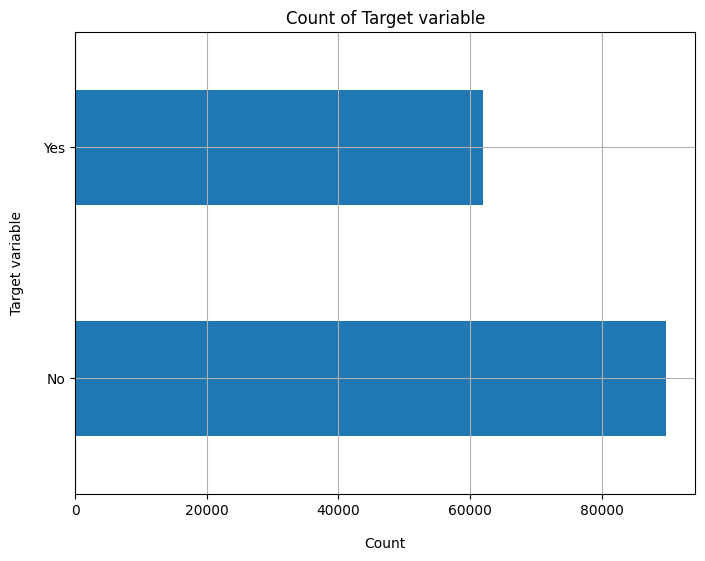

In [51]:
finaldf["churn"].value_counts().plot(kind='barh',figsize=(8,6))
plt.xlabel("Count",labelpad=14)
plt.ylabel("Target variable", labelpad=14)
plt.grid()
plt.title("Count of Target variable")

In [52]:
100*finaldf["churn"].value_counts()/len(finaldf["churn"])

churn
No     59.182691
Yes    40.817309
Name: count, dtype: float64

In [53]:
finaldf.churn.value_counts()

churn
No     89747
Yes    61897
Name: count, dtype: int64

In [54]:
max_dates=finaldf.groupby(["customer_id"])["book_id"].count()
finaldf["lastpurchasedate"]=finaldf.apply(lambda row:max_dates.loc[row["customer_id"]],axis=1)

In [55]:
finaldf["orderscount"]=finaldf.groupby('customer_id')['order_id'].transform('count') #calculating the number of orders for each customer
finaldf

,book_id,title,isbn13,language_id,num_pages,publication_date,publisher_id,publisher_name,author_id,author_name,language_code,language_name,line_id,order_id,price,order_date,customer_id,shipping_method_id,dest_address_id,method_name,cost,history_id,status_id_x,status_date,status_value,first_name,last_name,email,address_id,status_id_y,address_status,street_number,street_name,city,country_id,country_name,firstpurchasedate,lastpurchasedate,loyalty,tenure,churn,orderscount
0,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,8439,4537,18.07,2023-06-01 05:18:18,267,2,139,Priority,8.9,2941,1,2023-06-01 15:39:42,Order Received,Derrek,Kops,dkops7e@toplist.cz,139,1,Active,9939,Judy Avenue,Novo,164,Portugal,2023-05-25,35,647.0,33.0,No,35
1,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,8439,4537,18.07,2023-06-01 05:18:18,267,2,139,Priority,8.9,8733,2,2023-06-03 00:21:55,Pending Delivery,Derrek,Kops,dkops7e@toplist.cz,139,1,Active,9939,Judy Avenue,Novo,164,Portugal,2023-05-25,35,647.0,33.0,No,35
2,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,14549,9018,18.55,2024-01-17 19:58:54,1824,3,257,Express,11.9,6027,1,2024-01-17 23:21:11,Order Received,Whitney,Nation,wnationmv@google.co.jp,122,1,Active,5826,Hallows Crossing,Donskoye,172,Russia,2022-06-10,492,996.0,36.0,No,492
3,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,14549,9018,18.55,2024-01-17 19:58:54,1824,3,257,Express,11.9,6027,1,2024-01-17 23:21:11,Order Received,Whitney,Nation,wnationmv@google.co.jp,257,1,Active,3,Bayside Pass,Jieshou,42,China,2022-06-10,492,996.0,36.0,No,492
4,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,14549,9018,18.55,2024-01-17 19:58:54,1824,3,257,Express,11.9,6027,1,2024-01-17 23:21:11,Order Received,Whitney,Nation,wnationmv@google.co.jp,570,1,Active,1,Mariners Cove Trail,Jaunpils,115,Latvia,2022-06-10,492,996.0,36.0,No,492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151639,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,gla,Gaelic,10133,1774,11.38,2023-10-08 12:19:23,1997,2,533,Priority,8.9,1773,1,2023-10-08 12:49:58,Order Received,Janean,Coatsworth,jcoatsworthro@purevolume.com,533,1,Active,14712,Grover Avenue,Casal Galego,164,Portugal,2022-03-10,64,1088.0,511.0,Yes,64
151640,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,gla,Gaelic,11930,6835,16.95,2024-02-23 11:14:28,844,2,214,Priority,8.9,4692,1,2024-02-23 18:57:53,Order Received,Ardeen,Percifull,apercifullnf@archive.org,214,1,Active,29493,Hoard Street,Mabayo,159,Philippines,2022-09-04,34,910.0,373.0,Yes,34
151641,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,gla,Gaelic,11930,6835,16.95,2024-02-23 11:14:28,844,2,214,Priority,8.9,10588,2,2024-02-23 23:27:07,Pending Delivery,Ardeen,Percifull,apercifullnf@archive.org,214,1,Active,29493,Hoard Street,Mabayo,159,Philippines,2022-09-04,34,910.0,373.0,Yes,34
151642,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,gla,Gaelic,11930,6835,16.95,2024-02-23 11:14:28,844,2,214,Priority,8.9,18756,3,2024-02-25 06:16:58,Delivery In Progress,Ardeen,Percifull,apercifullnf@archive.org,214,1,Active,29493,Hoard Street,Mabayo,159,Philippines,2022-09-04,34,910.0,373.0,Yes,34


In [56]:
finaldf.rename(columns={'tenure':'inactive_tenure'},inplace=True)

In [57]:
finaldf

,book_id,title,isbn13,language_id,num_pages,publication_date,publisher_id,publisher_name,author_id,author_name,language_code,language_name,line_id,order_id,price,order_date,customer_id,shipping_method_id,dest_address_id,method_name,cost,history_id,status_id_x,status_date,status_value,first_name,last_name,email,address_id,status_id_y,address_status,street_number,street_name,city,country_id,country_name,firstpurchasedate,lastpurchasedate,loyalty,inactive_tenure,churn,orderscount
0,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,8439,4537,18.07,2023-06-01 05:18:18,267,2,139,Priority,8.9,2941,1,2023-06-01 15:39:42,Order Received,Derrek,Kops,dkops7e@toplist.cz,139,1,Active,9939,Judy Avenue,Novo,164,Portugal,2023-05-25,35,647.0,33.0,No,35
1,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,8439,4537,18.07,2023-06-01 05:18:18,267,2,139,Priority,8.9,8733,2,2023-06-03 00:21:55,Pending Delivery,Derrek,Kops,dkops7e@toplist.cz,139,1,Active,9939,Judy Avenue,Novo,164,Portugal,2023-05-25,35,647.0,33.0,No,35
2,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,14549,9018,18.55,2024-01-17 19:58:54,1824,3,257,Express,11.9,6027,1,2024-01-17 23:21:11,Order Received,Whitney,Nation,wnationmv@google.co.jp,122,1,Active,5826,Hallows Crossing,Donskoye,172,Russia,2022-06-10,492,996.0,36.0,No,492
3,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,14549,9018,18.55,2024-01-17 19:58:54,1824,3,257,Express,11.9,6027,1,2024-01-17 23:21:11,Order Received,Whitney,Nation,wnationmv@google.co.jp,257,1,Active,3,Bayside Pass,Jieshou,42,China,2022-06-10,492,996.0,36.0,No,492
4,4,What Life Was Like in the Jewel in the Crown: ...,34406054602,1,168,1999-09-01,1978,Time Life Medical,8651,Time-Life Books,eng,English,14549,9018,18.55,2024-01-17 19:58:54,1824,3,257,Express,11.9,6027,1,2024-01-17 23:21:11,Order Received,Whitney,Nation,wnationmv@google.co.jp,570,1,Active,1,Mariners Cove Trail,Jaunpils,115,Latvia,2022-06-10,492,996.0,36.0,No,492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151639,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,gla,Gaelic,10133,1774,11.38,2023-10-08 12:19:23,1997,2,533,Priority,8.9,1773,1,2023-10-08 12:49:58,Order Received,Janean,Coatsworth,jcoatsworthro@purevolume.com,533,1,Active,14712,Grover Avenue,Casal Galego,164,Portugal,2022-03-10,64,1088.0,511.0,Yes,64
151640,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,gla,Gaelic,11930,6835,16.95,2024-02-23 11:14:28,844,2,214,Priority,8.9,4692,1,2024-02-23 18:57:53,Order Received,Ardeen,Percifull,apercifullnf@archive.org,214,1,Active,29493,Hoard Street,Mabayo,159,Philippines,2022-09-04,34,910.0,373.0,Yes,34
151641,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,gla,Gaelic,11930,6835,16.95,2024-02-23 11:14:28,844,2,214,Priority,8.9,10588,2,2024-02-23 23:27:07,Pending Delivery,Ardeen,Percifull,apercifullnf@archive.org,214,1,Active,29493,Hoard Street,Mabayo,159,Philippines,2022-09-04,34,910.0,373.0,Yes,34
151642,9702,Harry Potter and the Philosopher's Stone (Harr...,9781582346816,26,250,2010-07-01,294,Bloomsbury USA Childrens,3570,J.K. Rowling,gla,Gaelic,11930,6835,16.95,2024-02-23 11:14:28,844,2,214,Priority,8.9,18756,3,2024-02-25 06:16:58,Delivery In Progress,Ardeen,Percifull,apercifullnf@archive.org,214,1,Active,29493,Hoard Street,Mabayo,159,Philippines,2022-09-04,34,910.0,373.0,

In [58]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151644 entries, 0 to 151643
Data columns (total 42 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   book_id             151644 non-null  object 
 1   title               151644 non-null  object 
 2   isbn13              151644 non-null  object 
 3   language_id         151644 non-null  object 
 4   num_pages           151644 non-null  object 
 5   publication_date    151644 non-null  object 
 6   publisher_id        151644 non-null  object 
 7   publisher_name      151644 non-null  object 
 8   author_id           151644 non-null  object 
 9   author_name         151644 non-null  object 
 10  language_code       151644 non-null  object 
 11  language_name       151644 non-null  object 
 12  line_id             151644 non-null  object 
 13  order_id            151644 non-null  object 
 14  price               151644 non-null  object 
 15  order_date          151644 non-nul

In [59]:
data=pd.DataFrame(finaldf)
print(data.corr(numeric_only=True)) #Correlation between the numeric columns

                  lastpurchasedate   loyalty  inactive_tenure  orderscount
lastpurchasedate          1.000000  0.283725        -0.245785     1.000000
loyalty                   0.283725  1.000000        -0.066897     0.283725
inactive_tenure          -0.245785 -0.066897         1.000000    -0.245785
orderscount               1.000000  0.283725        -0.245785     1.000000


In [60]:
#Removing unwanted columns by selecting required fields in a new df
df=finaldf[['order_date','price','inactive_tenure','loyalty','orderscount','churn']].copy()

In [61]:
df

,order_date,price,inactive_tenure,loyalty,orderscount,churn
0,2023-06-01 05:18:18,18.07,33.0,647.0,35,No
1,2023-06-01 05:18:18,18.07,33.0,647.0,35,No
2,2024-01-17 19:58:54,18.55,36.0,996.0,492,No
3,2024-01-17 19:58:54,18.55,36.0,996.0,492,No
4,2024-01-17 19:58:54,18.55,36.0,996.0,492,No
...,...,...,...,...,...,...
151639,2023-10-08 12:19:23,11.38,511.0,1088.0,64,Yes
151640,2024-02-23 11:14:28,16.95,373.0,910.0,34,Yes
151641,2024-02-23 11:14:28,16.95,373.0,910.0,34,Yes
151642,2024-02-23 11:14:28,16.95,373.0,910.0,34,Yes


In [62]:
df=df.drop_duplicates()
df

,order_date,price,inactive_tenure,loyalty,orderscount,churn
0,2023-06-01 05:18:18,18.07,33.0,647.0,35,No
2,2024-01-17 19:58:54,18.55,36.0,996.0,492,No
14,2024-11-22 07:56:38,8.83,18.0,1030.0,96,No
22,2023-07-25 06:39:15,13.25,207.0,586.0,40,Yes
30,2024-02-26 07:02:23,3.35,370.0,1100.0,64,Yes
...,...,...,...,...,...,...
151612,2022-02-17 11:17:54,2.36,509.0,1109.0,140,Yes
151616,2023-11-08 13:15:28,14.27,106.0,480.0,72,No
151624,2023-01-01 06:46:15,17.35,208.0,1092.0,37,Yes
151638,2023-10-08 12:19:23,11.38,511.0,1088.0,64,Yes


In [66]:
df=df.reset_index()

In [67]:
df=df.drop(["index"],axis=1)
df

,order_date,price,inactive_tenure,loyalty,orderscount,churn
0,2023-06-01 05:18:18,18.07,33.0,647.0,35,No
1,2024-01-17 19:58:54,18.55,36.0,996.0,492,No
2,2024-11-22 07:56:38,8.83,18.0,1030.0,96,No
3,2023-07-25 06:39:15,13.25,207.0,586.0,40,Yes
4,2024-02-26 07:02:23,3.35,370.0,1100.0,64,Yes
...,...,...,...,...,...,...
13936,2022-02-17 11:17:54,2.36,509.0,1109.0,140,Yes
13937,2023-11-08 13:15:28,14.27,106.0,480.0,72,No
13938,2023-01-01 06:46:15,17.35,208.0,1092.0,37,Yes
13939,2023-10-08 12:19:23,11.38,511.0,1088.0,64,Yes


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13941 entries, 0 to 13940
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_date       13941 non-null  object 
 1   price            13941 non-null  object 
 2   inactive_tenure  13941 non-null  float64
 3   loyalty          13941 non-null  float64
 4   orderscount      13941 non-null  int64  
 5   churn            13941 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 653.6+ KB


In [69]:
df['price']=pd.to_numeric(df['price'])

In [70]:
df['inactive_tenure']=pd.to_numeric(df['inactive_tenure'])

In [71]:
df['inactive_tenure']=df['inactive_tenure'].round().astype('Int64')

In [72]:
df['loyalty']=df['loyalty'].round().astype('Int64')

In [73]:
df['loyalty'].describe()

count       13941.0
mean     919.752242
std      196.433368
min            18.0
25%           855.0
50%           985.0
75%          1061.0
max          1110.0
Name: loyalty, dtype: Float64

In [74]:
df['price'].describe()

count    13941.000000
mean         9.948010
std          5.788321
min          0.000000
25%          4.930000
50%          9.900000
75%         14.930000
max         20.000000
Name: price, dtype: float64

In [75]:
df["inactive_tenure"].describe()

count       13941.0
mean     209.088588
std      195.715651
min            16.0
25%            69.0
50%           151.0
75%           278.0
max          1110.0
Name: inactive_tenure, dtype: Float64

In [76]:
# Ensure order_date is in datetime format
df['order_date'] = pd.to_datetime(df['order_date'])  

# Extract day, month, and year
df['order_date_day'] = df['order_date'].dt.day
df['order_date_month'] = df['order_date'].dt.month
df['order_date_year'] = df['order_date'].dt.year

In [77]:
for column in df.columns:
    print(df[column].value_counts())
    print(("*"*20))

order_date
2024-09-18 08:40:00    5
2023-10-23 22:48:13    5
2025-01-06 08:23:06    5
2025-02-07 17:40:29    5
2022-09-03 13:33:52    5
                      ..
2024-09-12 16:40:18    1
2024-11-29 23:15:55    1
2024-03-04 20:05:59    1
2024-09-19 05:25:56    1
2024-01-05 12:11:23    1
Name: count, Length: 7336, dtype: int64
********************
price
18.72    18
13.13    17
10.02    16
15.75    16
3.04     16
         ..
1.17      1
20.00     1
15.16     1
5.89      1
6.24      1
Name: count, Length: 1998, dtype: int64
********************
inactive_tenure
59     140
56     120
31     120
61     116
18     111
      ... 
502      1
867      1
706      1
776      1
640      1
Name: count, Length: 702, dtype: Int64
********************
loyalty
1040    145
1061    142
1077    136
1080    131
1082    129
       ... 
382       1
423       1
344       1
252       1
662       1
Name: count, Length: 684, dtype: Int64
********************
orderscount
168    241
132    237
40     210
44     201
9

In [78]:
print(finaldf["churn"].dtype)
print(finaldf["churn"].value_counts())

object
churn
No     89747
Yes    61897
Name: count, dtype: int64


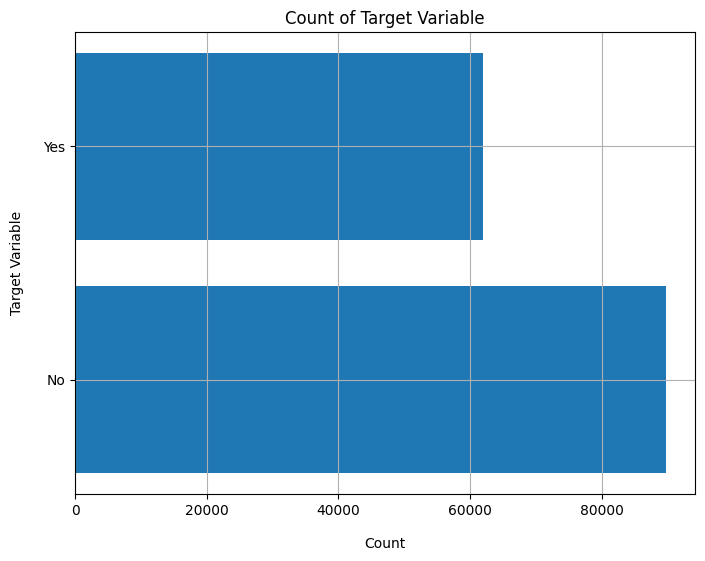

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get value counts
churn_counts = finaldf["churn"].value_counts()

# Convert index (labels) to string
churn_labels = churn_counts.index.astype(str)  # Ensure labels are strings
churn_values = churn_counts.values.astype(float)  # Convert counts to float (if necessary)

# Plot using Matplotlib
plt.figure(figsize=(8,6))
plt.barh(churn_labels, churn_values)

# Labels and title
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of Target Variable")
plt.grid()

plt.show()


In [80]:
#EDA - Exploratory Data analysis
import matplotlib.pyplot as plt 

Text(0.5, 1.0, 'Churn vs Order_Date_year')

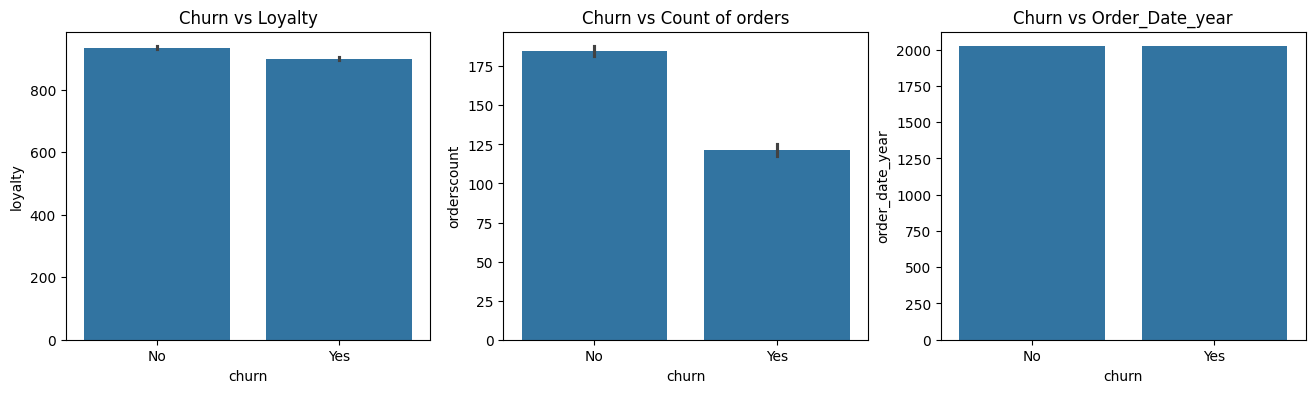

In [81]:
#plotting all the three numerical columns with churn
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.barplot(x=df["churn"],y=df["loyalty"]);
plt.title("Churn vs Loyalty")

plt.subplot(1,3,2)
sns.barplot(x=df["churn"],y=df["orderscount"]);
plt.title("Churn vs Count of orders")

plt.subplot(1,3,3)
sns.barplot(x=df["churn"],y=df["order_date_year"]);
plt.title("Churn vs Order_Date_year")

CONCLUSION These are some of the quick insights from this exercise:

Higher the loyalty lower the churn People with less orders have churned churn quality is evenly distributed for all years

In [178]:
import numpy as np
print(np.__version__)

2.0.2


In [82]:
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [83]:
le=preprocessing.LabelEncoder()

In [84]:
df["churn"]=le.fit_transform(df["churn"]) 
df["churn"].unique()

array([0, 1])

In [85]:
df

,order_date,price,inactive_tenure,loyalty,orderscount,churn,order_date_day,order_date_month,order_date_year
0,2023-06-01 05:18:18,18.07,33,647,35,0,1,6,2023
1,2024-01-17 19:58:54,18.55,36,996,492,0,17,1,2024
2,2024-11-22 07:56:38,8.83,18,1030,96,0,22,11,2024
3,2023-07-25 06:39:15,13.25,207,586,40,1,25,7,2023
4,2024-02-26 07:02:23,3.35,370,1100,64,1,26,2,2024
...,...,...,...,...,...,...,...,...,...
13936,2022-02-17 11:17:54,2.36,509,1109,140,1,17,2,2022
13937,2023-11-08 13:15:28,14.27,106,480,72,0,8,11,2023
13938,2023-01-01 06:46:15,17.35,208,1092,37,1,1,1,2023
13939,2023-10-08 12:19:23,11.38,511,1088,64,1,8,10,2023


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13941 entries, 0 to 13940
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_date        13941 non-null  datetime64[ns]
 1   price             13941 non-null  float64       
 2   inactive_tenure   13941 non-null  Int64         
 3   loyalty           13941 non-null  Int64         
 4   orderscount       13941 non-null  int64         
 5   churn             13941 non-null  int32         
 6   order_date_day    13941 non-null  int32         
 7   order_date_month  13941 non-null  int32         
 8   order_date_year   13941 non-null  int32         
dtypes: Int64(2), datetime64[ns](1), float64(1), int32(4), int64(1)
memory usage: 789.8 KB


In [87]:
#Correlation
my_matrix=df.corr(numeric_only=True).round(2)
my_matrix

,price,inactive_tenure,loyalty,orderscount,churn,order_date_day,order_date_month,order_date_year
price,1.00,0.01,-0.01,0.00,0.01,0.02,-0.02,0.00
inactive_tenure,0.01,1.00,-0.06,-0.31,0.73,0.01,-0.00,-0.29
loyalty,-0.01,-0.06,1.00,0.33,-0.09,0.01,-0.02,-0.28
orderscount,0.00,-0.31,0.33,1.00,-0.21,0.02,-0.00,-0.01
churn,0.01,0.73,-0.09,-0.21,1.00,0.00,-0.04,-0.19
order_date_day,0.02,0.01,0.01,0.02,0.00,1.00,0.02,-0.06
order_date_month,-0.02,-0.00,-0.02,-0.00,-0.04,0.02,1.00,-0.24
order_date_year,0.00,-0.29,-0.28,-0.01,-0.19,-0.06,-0.24,1.00


In [88]:
import seaborn as sns

<Axes: >

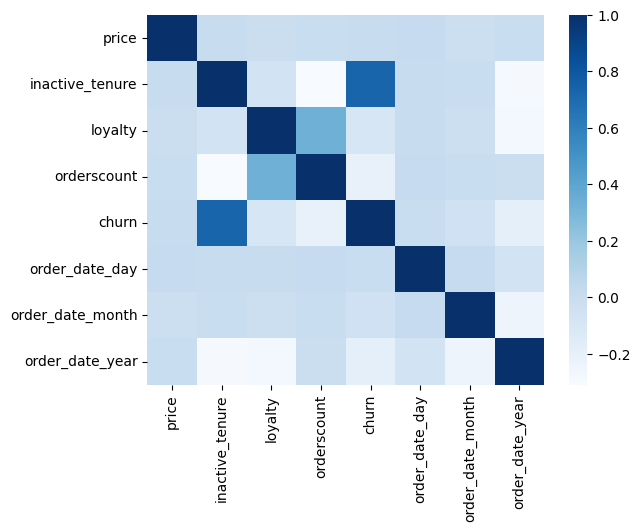

In [89]:
sns.heatmap(my_matrix,cmap="Blues")

In [90]:
#x and y declaration 
x=df.drop(["churn","order_date"],axis=1)
y=df["churn"]

In [91]:
x

,price,inactive_tenure,loyalty,orderscount,order_date_day,order_date_month,order_date_year
0,18.07,33,647,35,1,6,2023
1,18.55,36,996,492,17,1,2024
2,8.83,18,1030,96,22,11,2024
3,13.25,207,586,40,25,7,2023
4,3.35,370,1100,64,26,2,2024
...,...,...,...,...,...,...,...
13936,2.36,509,1109,140,17,2,2022
13937,14.27,106,480,72,8,11,2023
13938,17.35,208,1092,37,1,1,2023
13939,11.38,511,1088,64,8,10,2023


In [92]:
y

0        0
1        0
2        0
3        1
4        1
        ..
13936    1
13937    0
13938    1
13939    1
13940    1
Name: churn, Length: 13941, dtype: int32

In [93]:
from tensorflow.keras import utils
utils.to_categorical

<function keras.src.utils.numerical_utils.to_categorical(x, num_classes=None)>

In [94]:
from keras.utils import to_categorical # onehot encoder
y_new = to_categorical(y)

In [ ]:
# import tensorflow as tf
# print(tf.__version__)

2.18.0


In [97]:
#Splitting the data set into Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y_new,test_size=0.2,random_state=5)

In [98]:
X_train.shape

(11152, 7)

In [99]:
y_train.shape

(11152, 2)

In [100]:
y_new.shape

(13941, 2)

In [101]:
X_test.shape

(2789, 7)

In [102]:
len(X_train.columns)

7

In [103]:
y_train.shape

(11152, 2)

Build a model (ANN) in tensorflow/kera

In [104]:
#Model building

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential  # to build layer by layer
from tensorflow.keras.layers import Dense       # to decide depth of each layer

In [ ]:
# def f1_score(y_true, y_pred):
#     y_pred = tf.round(y_pred)

#     precision = K.sum(y_true * y_pred) / (K.sum(y_pred) + K.epsilon())
#     recall = K.sum(y_true * y_pred) / (K.sum(y_true) + K.epsilon())

#     f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
#     return f1

In [105]:
# Define the custom F1-score metric
def f1_score(y_true, y_pred):
    # Convert predictions to binary (0 or 1)
    y_pred = tf.round(y_pred)
    
    # Calculate precision
    precision = tf.reduce_sum(tf.cast(y_true * y_pred, tf.float32)) / (tf.reduce_sum(tf.cast(y_pred, tf.float32)) + tf.keras.backend.epsilon())
    
    # Calculate recall
    recall = tf.reduce_sum(tf.cast(y_true * y_pred, tf.float32)) / (tf.reduce_sum(tf.cast(y_true, tf.float32)) + tf.keras.backend.epsilon())
    
    # Calculate F1 score
    f1 = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
    return f1

In [106]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)
model2=Sequential()
#input dimension is 7 hence 7 neurons - developer scope
model2.add(Dense(256,input_dim=7,activation='relu')) # hidden layer 1
model2.add(Dense(128,activation='relu')) # hidden layer 2
model2.add(Dense(64,activation='relu'))# hidden layer 3
model2.add(Dense(32,activation='relu'))# hidden layer 4
model2.add(Dense(16,activation='relu'))# hidden layer 5
model2.add(Dense(2,activation='softmax'))# output layer
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=[
                                                                                'accuracy',
                                                                                tf.keras.metrics.Precision(),
                                                                                tf.keras.metrics.Recall(),f1_score  
                                                                                ])

c:\Users\admin\OneDrive\Desktop\GuviCapstone\finalproject\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [107]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), f1_score])

In [108]:
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (11152, 2)
y_test shape: (2789, 2)


In [109]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)
model2=Sequential()
#input dimension is 7 hence 7 neurons - developer scope
model2.add(Dense(256,input_dim=7,activation='relu')) # hidden layer 1
model2.add(Dense(128,activation='relu')) # hidden layer 2
model2.add(Dense(64,activation='relu'))# hidden layer 3
model2.add(Dense(32,activation='relu'))# hidden layer 4
model2.add(Dense(16,activation='relu'))# hidden layer 5
model2.add(Dense(2,activation='softmax'))# output layer
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=[
                                                                                'accuracy',
                                                                                tf.keras.metrics.Precision(),
                                                                                tf.keras.metrics.Recall(),f1_score  
                                                                                ])

In [123]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 256)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137,528 (537.22 KB)

 Trainable params: 45,842 (179.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 91,686 (358.15 KB)

In [124]:
model2.fit(X_train, y_train, epochs=50)

Epoch 1/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9949 - f1_score: 0.9949 - loss: 0.0126 - precision_2: 0.9949 - recall_2: 0.9949
Epoch 2/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9937 - f1_score: 0.9937 - loss: 0.0165 - precision_2: 0.9937 - recall_2: 0.9937
Epoch 3/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9934 - f1_score: 0.9934 - loss: 0.0167 - precision_2: 0.9934 - recall_2: 0.9934
Epoch 4/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9931 - f1_score: 0.9931 - loss: 0.0187 - precision_2: 0.9931 - recall_2: 0.9931
Epoch 5/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9933 - f1_score: 0.9933 - loss: 0.0172 - precision_2: 0.9933 - recall_2: 0.9933
Epoch 6/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9960 - f1_score: 0.9960 - loss: 0.0104 - precision_2: 0.9960 - recall_2: 0.9960
Epoch 7/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9955 - f1_score: 0.9955 - loss: 0.0094 - precision_2: 0.99

In [ ]:
# print("X_test shape:", X_test.shape)  # Should be (num_samples, 7)
# print("y_test shape:", y_test.shape)  # Should be (num_samples, 2) for one-hot encoding

X_test shape: (2789, 7)
y_test shape: (2789, 2)


In [ ]:
# print("X_test dtype:", X_test.dtype)
# print("y_test dtype:", y_test.dtype)

In [ ]:
# # Convert X_test to numeric (if it's a DataFrame)
# if isinstance(X_test, pd.DataFrame):
#     X_test = X_test.apply(pd.to_numeric, errors='coerce').values  # Convert to NumPy array

# # Convert y_test to numeric (if needed)
# if isinstance(y_test, pd.DataFrame):
#     y_test = y_test.apply(pd.to_numeric, errors='coerce').values
# elif isinstance(y_test, np.ndarray):
#     y_test = y_test.astype(np.float32)  # Ensure correct dtype

In [ ]:
# print("X_test shape:", X_test.shape)  # Expected: (num_samples, 7)
# print("y_test shape:", y_test.shape)  # Expected: (num_samples, 2)

X_test shape: (2789, 7)
y_test shape: (2789, 2)


In [ ]:
# print("X_test type:", type(X_test))  # Check if it's a NumPy array
# print("X_test dtype:", X_test.dtype)  # Check overall data type
# print("X_test shape:", X_test.shape)  # Check dimensions
# print(X_test[:5])  # View first few rows

X_test type: <class 'numpy.ndarray'>
X_test dtype: object
X_test shape: (2789, 7)
[[11.11 524 921 62 14 2 2023]
 [19.63 210 950 120 28 3 2024]
 [3.73 116 730 224 4 7 2024]
 [18.67 37 919 206 1 12 2023]
 [17.07 427 686 20 16 4 2023]]


In [ ]:
# X_test = X_test.astype(float)

In [ ]:
# print("X_test dtype:", X_test.dtype)
# print("y_test dtype:", y_test.dtype)

X_test dtype: float64
y_test dtype: float32


In [ ]:
# loss, accuracy, precision, recall, f1 = model2.evaluate(X_test, y_test, verbose=1)

# print(f"Loss: {loss:.4f}")
# print(f"Accuracy: {accuracy:.4f}")
# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"F1 Score: {f1:.4f}")

88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9923 - f1_score: 0.9923 - loss: 0.0147 - precision_2: 0.9923 - recall_2: 0.9923
Loss: 0.0160
Accuracy: 0.9921
Precision: 0.9921
Recall: 0.9921
F1 Score: 0.9922


In [120]:
model2.evaluate(X_test,y_test)

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9923 - f1_score: 0.9923 - loss: 0.0147 - precision_2: 0.9923 - recall_2: 0.9923


[0.015965748578310013,
 0.99211186170578,
 0.99211186170578,
 0.99211186170578,
 0.9921875]

In [126]:
# Evaluate the model on the test set
test_loss, test_accuracy, test_precision, test_recall, test_f1_score = model2.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test f1_score: {test_f1_score}")

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9994 - f1_score: 0.9994 - loss: 0.0039 - precision_2: 0.9994 - recall_2: 0.9994
Test Accuracy: 0.9989243745803833
Test Precision: 0.9989243745803833
Test Recall: 0.9989243745803833
Test f1_score: 0.9989346861839294


In [ ]:
# print("x type:", type(x), "y_new type:", type(y_new))
# print("x dtype:", x.dtype if isinstance(x, np.ndarray) else "Not a NumPy array")
# print("y_new dtype:", y_new.dtype if isinstance(y_new, np.ndarray) else "Not a NumPy array")


x type: <class 'pandas.core.frame.DataFrame'> y_new type: <class 'numpy.ndarray'>
x dtype: Not a NumPy array
y_new dtype: float64


In [ ]:
# x = x.astype(float)
# y_new = y_new.astype(float)

In [128]:
#Save the model
final=model2.evaluate(x, y_new)

436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9986 - f1_score: 0.9986 - loss: 0.0051 - precision_2: 0.9986 - recall_2: 0.9986


In [129]:
model2.save('model.h5')

In [135]:
model2.save('my_model.keras')

In [133]:
import joblib
joblib.dump(final,'churn_predictor_2') #saving the model named churn_predictor

['churn_predictor_2']

In [134]:
import joblib

# Assuming `model` is your trained model
joblib.dump(final, 'churn_predictor_2.pkl')

['churn_predictor_2.pkl']

In [137]:
# load the model from disk
final_model=joblib.load('churn_predictor_2')

In [138]:
import pickle
pickle.dump(model2,open(r"C:\Users\admin\OneDrive\Desktop\GuviCapstone\finalproject\churn_predictor_2.pkl","wb"))

In [139]:
#prediction on new data
newvalue=[[17,182,980,24,23,6,2024]] #1
newvalue2=[[12.67,137,1079,228,16,3,2022]]#0
newvalue3=[[2.67,36,1006,864,30,7,2023]]#0

In [140]:
newvalue=np.array(newvalue)
newvalue = newvalue.reshape(1, -1)  # Add batch dimension
newvalue2=np.array(newvalue2)
newvalue2 = newvalue2.reshape(1, -1) 
newvalue3=np.array(newvalue3)
newvalue3 = newvalue3.reshape(1, -1) 

In [141]:
# Predict
predictions = model2.predict(newvalue)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
[[0.06857838 0.9314216 ]]


In [142]:
# Predict
predictions2 = model2.predict(newvalue2)
print(predictions2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
[[1.0000000e+00 1.8926685e-10]]


In [143]:
# Predict
predictions3 = model2.predict(newvalue3)
print(predictions3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
[[1.0000000e+00 1.2559502e-33]]


In [144]:
x

,price,inactive_tenure,loyalty,orderscount,order_date_day,order_date_month,order_date_year
0,18.07,33,647,35,1,6,2023
1,18.55,36,996,492,17,1,2024
2,8.83,18,1030,96,22,11,2024
3,13.25,207,586,40,25,7,2023
4,3.35,370,1100,64,26,2,2024
...,...,...,...,...,...,...,...
13936,2.36,509,1109,140,17,2,2022
13937,14.27,106,480,72,8,11,2023
13938,17.35,208,1092,37,1,1,2023
13939,11.38,511,1088,64,8,10,2023


In [145]:
df

,order_date,price,inactive_tenure,loyalty,orderscount,churn,order_date_day,order_date_month,order_date_year
0,2023-06-01 05:18:18,18.07,33,647,35,0,1,6,2023
1,2024-01-17 19:58:54,18.55,36,996,492,0,17,1,2024
2,2024-11-22 07:56:38,8.83,18,1030,96,0,22,11,2024
3,2023-07-25 06:39:15,13.25,207,586,40,1,25,7,2023
4,2024-02-26 07:02:23,3.35,370,1100,64,1,26,2,2024
...,...,...,...,...,...,...,...,...,...
13936,2022-02-17 11:17:54,2.36,509,1109,140,1,17,2,2022
13937,2023-11-08 13:15:28,14.27,106,480,72,0,8,11,2023
13938,2023-01-01 06:46:15,17.35,208,1092,37,1,1,1,2023
13939,2023-10-08 12:19:23,11.38,511,1088,64,1,8,10,2023


In [146]:
result=model2.predict(newvalue)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[0.06857838 0.9314216 ]]
